# Scraping and Advanced EDA and NLP Analysis on IMDB'S "The Last of Us" Reviews 

### - Scraping TLOU Reviews from IMDB
###  - Understanding the data
    - Shape of the data
    - Check column dtypes
    - Check is there any null values
### -  Data Preprocessing  
    - Convert Date Format to Datetime
    - Convert Rating Format to Int
 
### - Feature Engineering 
    - Create Sentiment by Review Rating
    
### - Analyzing Reviews 
    - What Rating Did the Users Give to the Series? 
    - Whats the Min, AVG, Max of Ratings?
    - What's the number of reviews according to episodes release date?
    - Review Sentiments Based on Rating
    - What's the Most Frequent Words in the Reviews?
### - Extract Reviews with Bella Ramsey and Pedro Pascal Mentions and Apply Sentiment Analysis on Them

In [25]:
# Data Preprocessing
import pandas as pd

# NER and Sentiment Analysis
from transformers import pipeline
import spacy
import torch

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings 

# Visualization Setup
%matplotlib inline
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')

# "The Last of Us" color palette
color_palette = ['#3b3328','#af533a','#5c543d','#856451','#281c10']

## Understanding the data
- Shape of the data
- Check column dtypes
- Check is there any null values

In [3]:
df = pd.read_csv('TLOU2.csv')

### Shape of the data

In [95]:
df.shape

(14350, 3)

### Check column dtypes

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14350 entries, 0 to 14349
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  14350 non-null  object 
 1   Rating  14079 non-null  float64
 2   Date    14350 non-null  object 
dtypes: float64(1), object(2)
memory usage: 336.5+ KB


### Check is there any null values

In [101]:
df.isnull().sum()

Review      0
Rating    271
Date        0
dtype: int64

## Data Preprocessing  
- Convert Date Format to Datetime
- Convert Rating Format to Int

In [105]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

In [12]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'] = df['Rating'].astype('Int64')

## Feature Engineering 
- Create Sentiment by Review Rating

In [13]:
def reviwe_by_rating(x):
    """
    This function determine review sentiment 
    based on their rating
    """
    if x > 5: 
        review = 'Positive'
    elif 5>x:
        review = 'Negative'
    else:
        review = 'Moderate'
    return review

In [14]:
df['ReviewByRating'] = df['Rating'].apply(lambda x: reviwe_by_rating(x) if not pd.isna(x) else x)

## Analyzing Reviews 
- What Rating Did the Users Give to the Series? 
- Whats the Min, AVG, Max of Ratings?
- What's the number of reviews according to episodes release date?
- Review Sentiments Based on Rating
- What's the Most Frequent Words in the Reviews?

Text(0.5, 1.0, 'Rating Count 1 - 10')

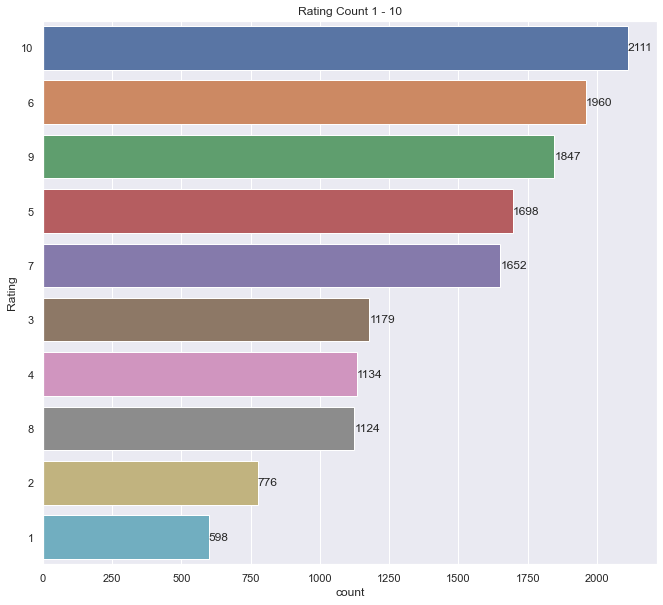

In [28]:
plt.rcParams['figure.figsize'] = (11, 10)
countplot=sns.countplot(y='Rating',data=df,order=df['Rating'].value_counts().index)
for container in countplot.containers:
    countplot.bar_label(container)
countplot.set_title('Rating Count 1 - 10')

Text(0.5, 1.0, 'Rating Min - Mean - Max')

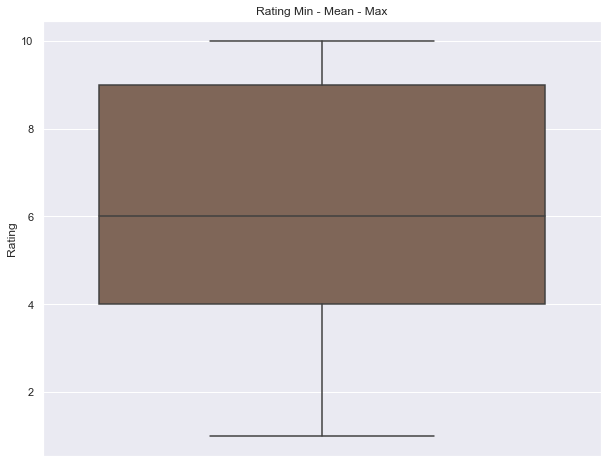

In [32]:
plt.rcParams['figure.figsize'] = (10, 8)
RTboxplt= sns.boxplot(y=df['Rating'],palette=[color_palette[3]])
RTboxplt.set_title('Rating Min - Mean - Max')

### What's the number of reviews according to episodes release date? 

- Episode 1, "When You're Lost in the Darkness" — January 15 
- Episode 2, "Infected" — January 22 
- Episode 3, "Long Long Time" — January 29 
- Episode 4, "Please Hold My Hand" — February 5 
- Episode 5, "Endure and Survive" — February 12 
- Episode 6, "Kin" — February 19 
- Episode 7, "Left Behind" — February 26
- Episode 8, "When We Are in Need" — March 5
- Episode 9, "Look for the Light" — March 12

In [36]:
def count_reviews_between_dates(df, date_ranges):
    """
    This function count number of reviews Between date X and Y 
    
    """
    review_counts = []
    for start_date, end_date in date_ranges:
        reviews_between_dates = df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
        review_counts.append(len(reviews_between_dates))

    return review_counts


In [37]:
date_ranges = [('2023-01-15', '2023-01-22'), ('2023-01-22', '2023-01-29'), ('2023-01-29', '2023-02-05'), ('2023-02-05','2023-02-12'),('2023-02-12','2023-02-19'), ('2023-02-19','2023-02-26'),('2023-02-26','2023-03-05'),('2023-03-05','2023-03-12')]
review_counts = count_reviews_between_dates(df, date_ranges)

In [38]:
# create a list of tuples by zipping date_ranges and review_counts
data = list(zip(date_ranges, review_counts))

# create a Pandas dataframe from the list of tuples
date_reviews = pd.DataFrame(data, columns=['date_range', 'review_count'])

Text(0.5, 1.0, 'Reviews Count According to Episode Release Date (Sorted by EP Number)')

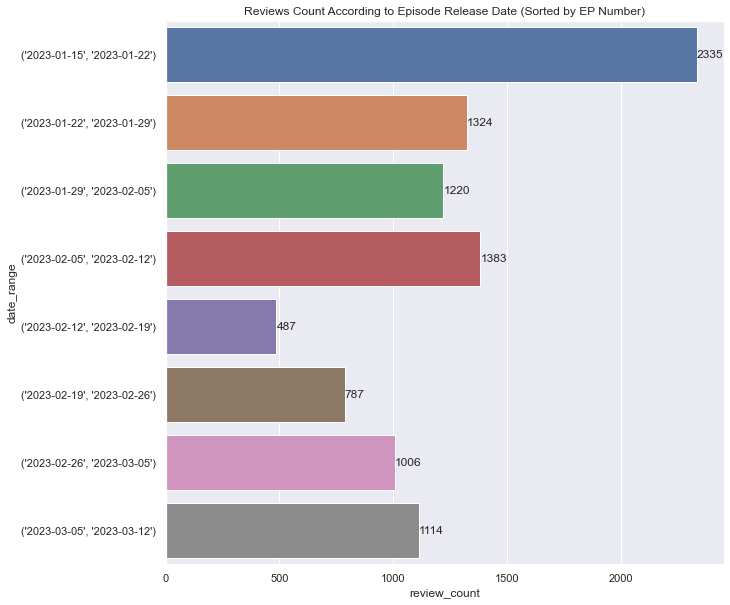

In [92]:
plt.rcParams['figure.figsize'] = (10, 10)

countplot = sns.barplot(y='date_range', x='review_count', data=date_reviews)
for container in countplot.containers:
    countplot.bar_label(container)
    # episode 
countplot.set_title('Reviews Count According to Episode Release Date (Sorted by EP Number)')

### Sentiments Based on Rating

Text(0.5, 1.0, 'Positivity of Reviews')

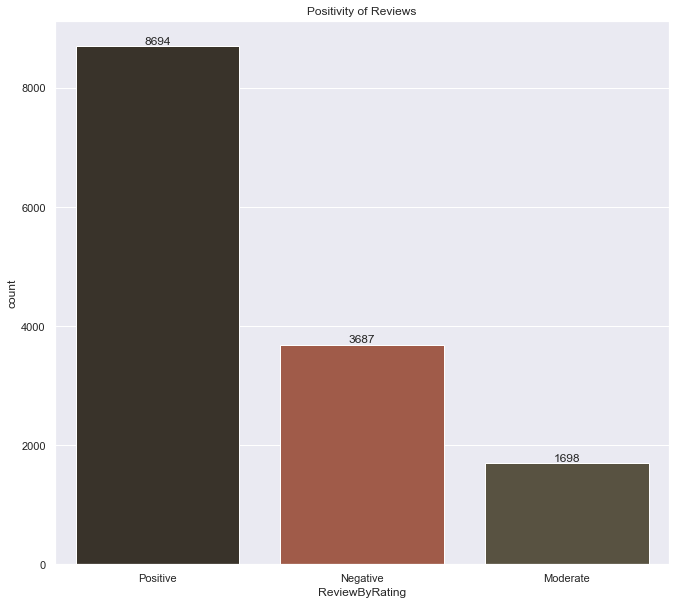

In [41]:
plt.rcParams['figure.figsize'] = (11, 10)
countplot=sns.countplot(x='ReviewByRating',data=df,palette=color_palette)
for container in countplot.containers:
    countplot.bar_label(container)
countplot.set_title('Positivity of Reviews')

### What's the Most Frequent Words in the Reviews?

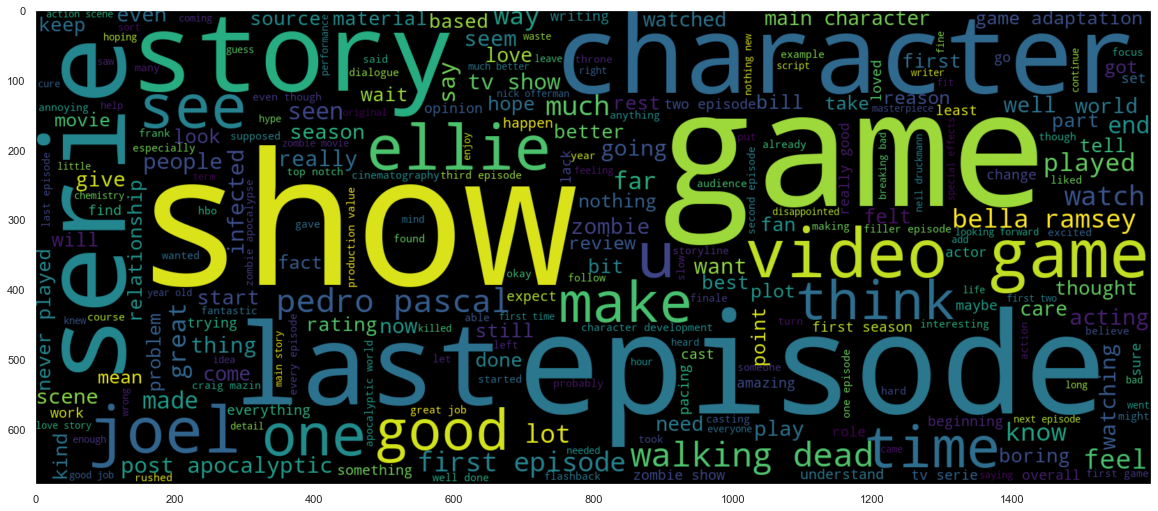

In [133]:
plt.figure(figsize = (20,20)) 
worldcould_bad = WordCloud(min_font_size = 3,  max_words = 250 , width = 1600 , height = 680).generate(" ".join(df['Review']))
plt.imshow(worldcould_bad,interpolation = 'bilinear')
plt.grid(None)

## Extract Reviews with Bella Ramsey and Pedro Pascal Mentions and Apply Sentiment Analysis on Them

In [35]:
# Preprocess the text data
df['Review'] = df['Review'].apply(lambda x: x.lower()) # Convert to lowercase if the value is a string

# Load the SpaCy English language model
nlp = spacy.load('en_core_web_sm')

# Define the cast members' names
cast_names = ['Bella Ramsey', 'Pedro Pascal']

# Create separate columns for each cast member and initialize them to zero
for name in cast_names:
    df[name] = 0

# Load the sentiment analysis model from Hugging Face
classifier = pipeline('sentiment-analysis', device=0 if torch.cuda.is_available() else -1)

# Analyze the sentiment of each review and count positive and negative mentions for each cast member
for index, row in df.iterrows():
    review = row['Review']
    if isinstance(review, str):
        sentiment = classifier(review, max_length=512)[0]['label']
        for name in cast_names:
            if name.lower() in [entity.text.lower() for entity in nlp(review).ents if entity.label_ == 'PERSON']:
                if sentiment == 'POSITIVE':
                    df.at[index, name] += 1
                elif sentiment == 'NEGATIVE':
                    df.at[index, name] -= 1

# Calculate the total number of positive and negative mentions for each cast member
for name in cast_names:
    df[f'{name}_positive'] = df[name].apply(lambda x: max(x, 0))
    df[f'{name}_negative'] = df[name].apply(lambda x: min(x, 0))
    del df[name]

# Print the results
for name in cast_names:
    pos_count = df[f'{name}_positive'].sum()
    neg_count = df[f'{name}_negative'].sum()
    total_count = pos_count + abs(neg_count)
    if total_count > 0:
        pos_percent = round(pos_count / total_count * 100)
        neg_percent = round(abs(neg_count) / total_count * 100)
        print(f'{name}: {pos_percent}% positive, {neg_percent}% negative ({total_count} reviews)')
    else:
        print(f'{name}: No reviews found')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\g513\anaconda3\envs\tf25\lib\site-packages\transformers\pipelines\base.py:899: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Bella Ramsey: 59% positive, 41% negative (1966 reviews)
Pedro Pascal: 69% positive, 31% negative (1069 reviews)


In [5]:
df.head(5)

,Review,Rating,Date,Bella Ramsey_positive,Bella Ramsey_negative,Pedro Pascal_positive,Pedro Pascal_negative
0,i'll start with the negatives:my opinion after...,7.0,2023-03-13,0,0,0,0
1,"so first of all, this is a fantastic show and ...",9.0,2023-03-13,1,0,0,0
2,season 1:while i may feel disappointment by th...,7.0,2023-03-13,0,-1,0,0
3,the last of us has to be one of the best new s...,9.0,2023-01-23,1,0,1,0
4,'the last of us' is a post-apocalyptic drama t...,9.0,2023-04-04,1,0,0,0


In [48]:
non_zero_counts = df[['Bella Ramsey_positive', 'Bella Ramsey_negative', 'Pedro Pascal_positive', 'Pedro Pascal_negative']].astype(bool).sum()
non_zero_counts = non_zero_counts[non_zero_counts != 0]

In [86]:
print(non_zero_counts.sum(),"of",len(df),"are about Bella Ramsey and Pedro Pascal")

3035 of 14350 are about Bella Ramsey and Pedro Pascal


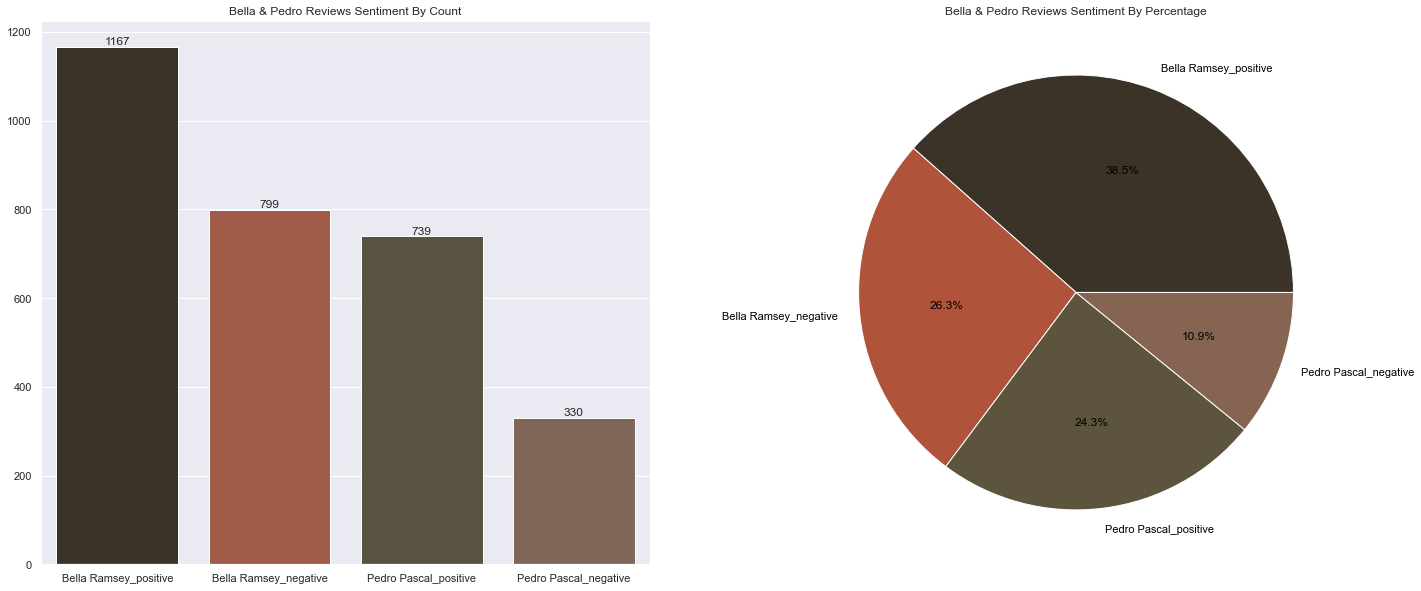

In [85]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(24,10))

ax = sns.barplot(x=non_zero_counts.index, y=non_zero_counts.values,palette=color_palette,ax=axis1)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Bella & Pedro Reviews Sentiment By Count')

axis2.pie(non_zero_counts.values, labels=non_zero_counts.index, autopct='%1.1f%%',colors=color_palette,textprops={'color':'black'})
axis2.set_title('Bella & Pedro Reviews Sentiment By Percentage')

plt.show()

In [6]:
df.head(5).iloc[2].Review

"season 1:while i may feel disappointment by this television adaptation. i am grateful that it introduced the greatest story gaming has ever told to a wider audience, an audience that never would have experienced or connected with it in its previous form.the biggest problem that this series has is the pacing. with only nine episodes a lot of the story feels rushed, and certain important scenes or entire segments needed more time. although to be fair, that may be the fault of hbo for not believing in druckmann's stellar work.committing an entire episode to both the left behind dlc and bill and frank seems like a mistake in hindsight. while both episodes are great, they really take you out of the main story. we don't get as much quality joel and ellie time because of it. part of why the game works so well is because you spend nearly 20 hours with these characters in the game. you connect with them, you feel as if you know them personally, you deeply care about them. all the small talk ab

Text(0.5, 1.0, 'Bella Ramsey vs Pedro Pascal Negative Reviews')

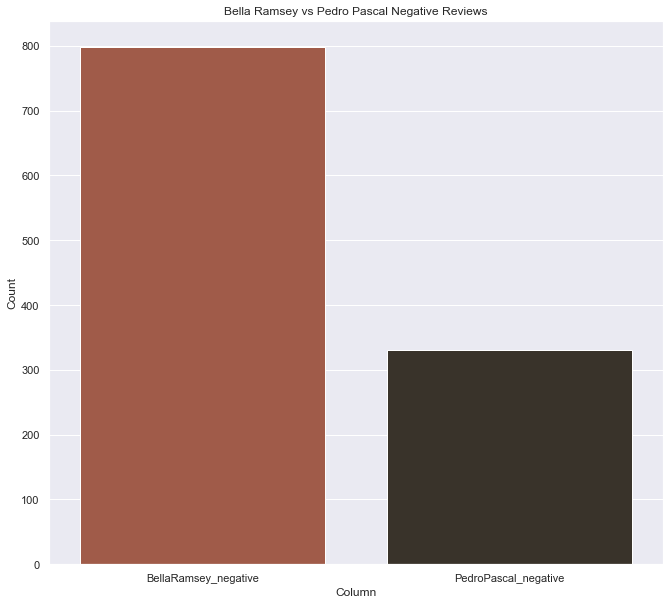

In [87]:
count_bella_negative = (df['Bella Ramsey_negative'] == -1).sum()

# Count the number of occurrences of -1 in BellaRamsey_nega column
count_pedro_negative = (df['Pedro Pascal_negative'] == -1).sum()

# Create a dictionary to store the counts
counts = {'Column': ['BellaRamsey_negative', 'PedroPascal_negative'], 'Count': [count_bella_negative, count_pedro_negative]}

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(counts)

# Create the count plot
countplot = sns.barplot(x='Column', y='Count', data=counts_df,palette=['#af533a','#3b3328'])

countplot.set_title('Bella Ramsey vs Pedro Pascal Negative Reviews')


Text(0.5, 1.0, 'Bella Ramsey vs Pedro Pascal Positive Reviews')

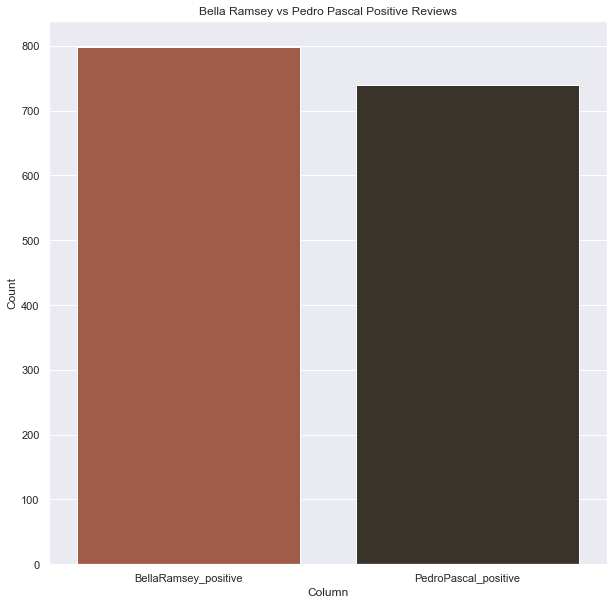

In [93]:
count_bella_positive = (df['Bella Ramsey_positive'] == 1).sum()

# Count the number of occurrences of -1 in BellaRamsey_nega column
count_pedro_negative = (df['Pedro Pascal_positive'] == 1).sum()

# Create a dictionary to store the counts
counts = {'Column': ['BellaRamsey_positive', 'PedroPascal_positive'], 'Count': [count_bella_negative, count_pedro_negative]}

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(counts)

# Create the count plot
countplot = sns.barplot(x='Column', y='Count', data=counts_df,palette=['#af533a','#3b3328'])

countplot.set_title('Bella Ramsey vs Pedro Pascal Positive Reviews')
